# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.141126e+01     8.631749e+00
 * time: 0.003876924514770508
     1     2.852977e+01     4.326125e+00
 * time: 0.017500877380371094
     2     1.858953e+01     3.419109e+00
 * time: 0.034108877182006836
     3     1.270700e+01     2.348353e+00
 * time: 0.05060601234436035
     4     1.088907e+01     2.300453e+00
 * time: 0.06385302543640137
     5     1.004897e+01     1.829133e+00
 * time: 0.07723689079284668
     6     9.395892e+00     1.109422e+00
 * time: 0.09065985679626465
     7     8.842498e+00     9.402086e-01
 * time: 0.10422682762145996
     8     8.481407e+00     6.067121e-01
 * time: 0.11769390106201172
     9     8.298804e+00     4.087418e-01
 * time: 0.1311509609222412
    10     8.260165e+00     7.108635e-01
 * time: 0.14155292510986328
    11     8.224460e+00     8.609159e-01
 * time: 0.1523120403289795
    12     8.208671e+00     5.765791e-01
 * time: 0.1629469394683838
    13     8.136216e+00     5.103884e-01
 * time:

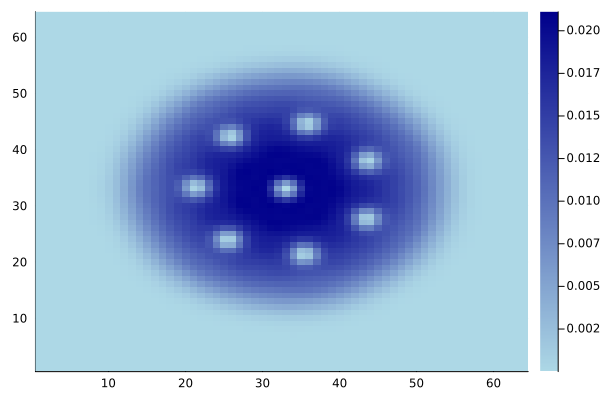

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)